# DIABETS PREDICTION 

In [1]:
# Setting New Working Directory.

# First Import Python's os Module.
import os

# Print Current Working Directory.
print("Current Working Directory is:",os.getcwd())

# Change the Current Working Directory using os.chdir(path)
os.chdir("F:/EDP on BUSINESS ANALYTICS/CAPSTONE PROJECT")
print("New Working Directory is:",os.getcwd())

Current Working Directory is: C:\Users\hp
New Working Directory is: F:\EDP on BUSINESS ANALYTICS\CAPSTONE PROJECT


In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing mord using pip (Python Package Index) in current Jupyter kernel
import sys
!{sys.executable} -m pip install mord

In [4]:
## Import required packages

%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

# Import & Partitioning Dataset

In [5]:
diabets_df = pd.read_csv('Diabetes_ Prediction.csv')
diabets_df.columns = [c.replace(' ', '_') for c in diabets_df.columns]

y = diabets_df['Outcome']
X = diabets_df.drop(columns=['Outcome'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# FULL MODEL

In [6]:
# fit a logistic regression (setting, penalty=l2 and C=1e42 to avoid regularization)
diabets_df = pd.read_csv('Diabetes_ Prediction.csv')
diabets_df.columns = [c.replace(' ', '_') for c in diabets_df.columns]

y = diabets_df['Outcome']
X = diabets_df.drop(columns=['Outcome'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -8.652659723053668
       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
coeff      0.07651  0.034937      -0.018868      -0.004197  0.000187   

            BMI  DiabetesPedigreeFunction       Age  
coeff  0.110725                  0.419771  0.024783  

AIC 450.6569111719219


# Compute Probabilities

In [7]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })


# CONFUSION MATRIX

In [8]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1
     0 261  40
     1  62  97
Confusion Matrix (Accuracy 0.7630)

       Prediction
Actual   0   1
     0 176  23
     1  50  59


# Gains & Lift Chart

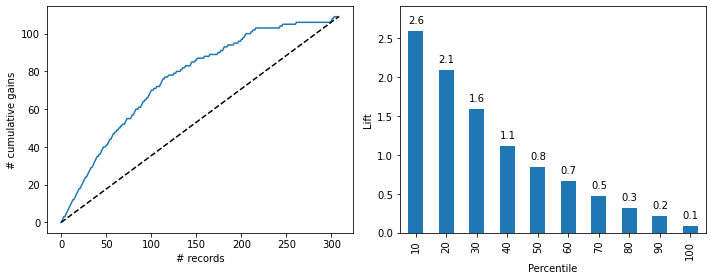

In [9]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()